# Hands on Lab on Data Analysis and Visualzations

### Importing Libraries

#### Install Library through anaconda Distribution

#### Install Library through Pip

### Lets install required libraries to do hands on Lab

In [1]:
# Data analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Load Dataset

In [3]:
df = pd.read_csv("datasets/telecom_churn.csv")    # Pandas will accept many extensions like .csv, .tsv, .xslx etc.

In [4]:
df.tail() # Will Default display top 5 rows in dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [67]:
df.info()  # Lets see the complete information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [68]:
df.isna().sum()  # To checl if table conatins any null values or not

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [69]:
df['churn'].unique()  #Churn Contains Either True or False

array([False,  True])

In [70]:
df.shape  # Lets have a look of number of rows and columns

(3333, 21)

In [71]:
df.columns  # To print all the columns in dataset

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

We can change the column type with the <b>astype</b> method. to any datatype lets convert it into int64:

In [5]:
df['churn'] = df['churn'].astype('int64')

In [6]:
df['churn'].unique()

array([0, 1], dtype=int64)

### Lets Describe the basic analysis of data

In [73]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Include parameter helps to select only specified fields which meets the data types we mentioned

In [7]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,348-7224,no,no
freq,106,1,3010,2411


### Exclude parameter helps to remove  specified fields which meets the data types we mentioned

In [75]:
df.describe(exclude=['float64', 'int64'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,410-3159,no,no
freq,106,1,3010,2411


### For Categorical and Boolean values we can use value_counts to find total count of each variable present in data

In [76]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [9]:
df['state'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: state, dtype: int64

### Normalize which helps the data lie on same line ( Which caluclates fractions)

In [ ]:
Indepenednt

In [78]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

### Data Sorted by single column or based on muliple columns

In [25]:
df.sort_values(['total day charge'],ascending=['False'],inplace=True)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1


In [ ]:
1 3
1 1 
1 2
2 2
2 1
3

In [26]:
df.sort_values(['total day charge','total day calls'],ascending=['True','False'])  # inplace=True which helps to sort df without asisgnment

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1


In [28]:
# Mean , Min, Max basic stat formaule
df['churn'].max()  

1

### Average values of all numeric features for churn value is 0

In [32]:
df[df['churn']==1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

In [31]:
df[df['churn'] == 1]['total day minutes'].mean()  #If want to access for single column

206.91407867494823

In [33]:
### More complex Logic
df[(df['churn']==0) & (df['international plan'] == 'no')]['total day minutes'].max()

315.6

### Difference Btw loc and iloc to access soem part in Dataframe

In [34]:
df.loc[100:104,"state":"international plan"]  

,state,account length,area code,phone number,international plan
100,IA,98,510,379-6506,no
1752,NY,181,415,421-8537,yes
2208,DE,129,408,362-6528,no
745,WA,119,415,380-6631,no
3199,WA,152,510,337-4403,no
...,...,...,...,...,...
1500,ID,96,408,363-3295,no
778,LA,115,415,386-6306,no
376,DC,138,415,329-6562,no
1632,KY,112,415,360-8135,no


In [35]:
df.iloc[0:3,2:5]   # Its more of kind of matrix  accessing particular location [rowStart:rowEnd,columnStart:columnend]

,area code,phone number,international plan
1397,510,413-7655,no
1345,415,392-2555,no
2736,510,403-1128,no


### To access First row or Last Row

In [87]:
df[:1]  # first Row

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [88]:
df[-1:]  #Last Row

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Apply Functions to cells , rows, columns

In [36]:
df.apply(np.min)  # Will return max value in each column 

state                           AK
account length                   1
area code                      408
phone number              327-1058
international plan              no
voice mail plan                 no
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes           23.2
total night calls               33
total night charge            1.04
total intl minutes               0
total intl calls                 0
total intl charge                0
customer service calls           0
churn                            0
dtype: object

### Selecting all states starting with C with apply() function

In [90]:
df[df['state'].apply(lambda s: s[0]=='C')].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
56,CO,141,415,340-5121,no,no,0,126.9,98,21.57,...,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0
57,CO,121,408,370-7574,no,yes,30,198.4,129,33.73,...,77,6.40,181.2,77,8.15,5.8,3,1.57,3,1
61,CA,116,415,405-3371,no,yes,34,268.6,83,45.66,...,142,15.15,166.3,106,7.48,11.6,3,3.13,2,0
82,CO,55,408,419-2637,no,yes,25,165.6,123,28.15,...,95,11.57,175.7,90,7.91,11.0,2,2.97,3,0


### Map method is used to replace values in columns to other values 

In [37]:
df['international plan']

1397     no
1345     no
2736     no
2753     no
1986     no
       ... 
605      no
156      no
2594    yes
985     yes
365      no
Name: international plan, Length: 3333, dtype: object

In [38]:
iPlan = {"yes":True,"no":False}
df['international plan'] = df['international plan'].map(iPlan)

In [39]:
df['international plan'].unique()

array([False,  True])

### Same Map functionality can be done by Replace fucntions also

In [41]:
df= df.replace({'voice mail plan':iPlan})

In [42]:
df['voice mail plan'].unique()

array([False,  True])

### Grouping

In [43]:
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']

df.groupby(['churn'])[columns_to_show].describe(percentiles=[])

total day minutes                                            \
                  count        mean        std  min    50%    max   
churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      total eve minutes                                             \
                  count        mean        std   min    50%    max   
churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      total night minutes                                              
                    count        mean        std   min     50%    max  
churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

### Quantile

In [109]:
df.groupby(['churn']).quantile(.90)  # Applying Quantile metric

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,,,
0,152.0,510.0,0.0,1.0,32.0,237.70,125.1,40.410,263.52,125.0,22.401,263.90,124.0,11.880,13.4,8.0,3.62,3.0
1,153.8,510.0,1.0,1.0,29.0,291.04,126.8,49.474,276.74,125.8,23.524,266.72,126.0,12.002,14.1,7.0,3.81,5.0


### Aggregation

In [111]:
df.groupby(['churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total day minutes                        total eve minutes             \
                   mean        std amin   amax              mean        std   
churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   total night minutes                          
       amin   amax                mean        std  amin   amax  
churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

### Table Summary

Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the <b>crosstab</b> method:

In [113]:
pd.crosstab(df['churn'],df['international plan'])

international plan,False,True
churn,,
0,2664,186
1,346,137


### Pivot vs  Pivot Table

In [46]:
pivot_example = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'], 
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   'baz': [1, 2, 3, 4, 5, 6]})
pivot_example

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


In [117]:
pivot_example.pivot(index='foo', columns='bar', values='baz') 

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [48]:
pivot_example = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'], 
                   'bar': ['A', 'B', 'A', 'A', 'B', 'B'], 
                   'baz': [1, 2, 3, 4, 5, 6]}) 
pivot_example

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,A,3
3,two,A,4
4,two,B,5
5,two,B,6


In [49]:
pivot_example.pivot(index='foo', columns='bar', values='baz')  # Will thorow error as Index contains duplicate entries, cannot reshape

ValueError: Index contains duplicate entries, cannot reshape

In [50]:
pivot_example.pivot_table(index='foo', columns='bar', values='baz')  # Each duplicate value was aggregated using the default aggregation method

bar,A,B
foo,,
one,2.0,2.0
two,4.0,5.5


### Lets Apply for Main churn dataset

In [130]:
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],['area code'], aggfunc='max')

,total day calls,total eve calls,total night calls
area code,,,
408,158,155,155
415,165,170,175
510,158,152,158


### DataFrame transformations

#### Insert a new column using insert() function 

In [51]:
total_calls = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df.insert(loc=len(df.columns),column='total_calls',value=total_calls)

In [52]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls
1397,VT,101,510,413-7655,False,False,0,0.0,0,0.00,...,16.33,168.8,95,7.60,7.2,4,1.94,1,0,218
1345,SD,98,415,392-2555,False,False,0,0.0,0,0.00,...,13.57,167.1,88,7.52,6.8,1,1.84,4,1,219
2736,OK,127,510,403-1128,False,True,27,2.6,113,0.44,...,21.59,242.7,156,10.92,9.2,5,2.48,3,0,376
2753,OH,134,415,406-4158,False,False,0,7.8,86,1.33,...,14.57,186.5,80,8.39,12.9,2,3.48,2,0,268
1986,WI,70,415,405-9233,False,False,0,7.9,100,1.34,...,11.59,156.6,89,7.05,12.1,1,3.27,0,0,273


we can add withoiut insert() function

In [53]:
df['total_charge'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_charge
1397,VT,101,510,413-7655,False,False,0,0.0,0,0.00,...,168.8,95,7.60,7.2,4,1.94,1,0,218,218
1345,SD,98,415,392-2555,False,False,0,0.0,0,0.00,...,167.1,88,7.52,6.8,1,1.84,4,1,219,219
2736,OK,127,510,403-1128,False,True,27,2.6,113,0.44,...,242.7,156,10.92,9.2,5,2.48,3,0,376,376
2753,OH,134,415,406-4158,False,False,0,7.8,86,1.33,...,186.5,80,8.39,12.9,2,3.48,2,0,268,268
1986,WI,70,415,405-9233,False,False,0,7.9,100,1.34,...,156.6,89,7.05,12.1,1,3.27,0,0,273,273


### Drop function 

To delete columns we need to pass list to drop function which will we want to delete <br>
by defualt inplace=False which means the changes wont apply to datframe only to show, to apply changes directly to df keep True

In [54]:
df.drop(['total_charge', 'total_calls'], axis=1, inplace=True) 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1397,VT,101,510,413-7655,False,False,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
1345,SD,98,415,392-2555,False,False,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
2736,OK,127,510,403-1128,False,True,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,406-4158,False,False,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,405-9233,False,False,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0


### Lets visulaze basic bar chart with seaborn

<AxesSubplot:xlabel='international plan', ylabel='count'>

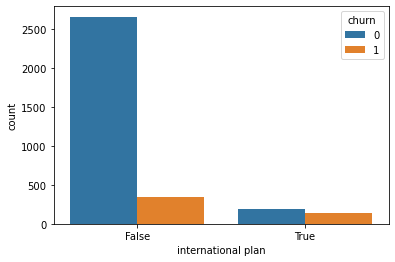

In [145]:
sns.countplot(x='international plan',hue='churn',data=df)

In [147]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<AxesSubplot:xlabel='customer service calls', ylabel='count'>

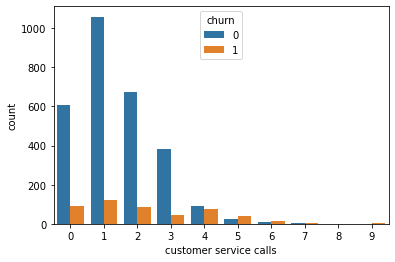

In [146]:
sns.countplot(x='customer service calls', hue='churn', data=df)

## Reference
https://mlcourse.ai/